In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_val_predict
import pandas as pd 
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing

#### LOADING THE DATA

In [2]:
data = pd.read_csv("loans_2007.csv")
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
6,1069639,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
7,1072053,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
8,1071795,1306957.0,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
9,1071570,1306721.0,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [4]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### FEATURE ENGINEERING

In [5]:
data = data.drop(columns=['id', 'member_id','funded_amnt', 'funded_amnt_inv','sub_grade','emp_title','issue_d','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','out_prncp', 'out_prncp_inv','zip_code', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   grade                       42535 non-null  object 
 5   emp_length                  41423 non-null  object 
 6   home_ownership              42535 non-null  object 
 7   annual_inc                  42531 non-null  float64
 8   verification_status         42535 non-null  object 
 9   loan_status                 42535 non-null  object 
 10  pymnt_plan                  42535 non-null  object 
 11  purpose                     42535 non-null  object 
 12  title                       42522 non-null  object 
 13  addr_state                  425

In [7]:
for i in range(0,33,5):
  print(data.iloc[:,i:i+5].head())

   loan_amnt        term int_rate  installment grade
0     5000.0   36 months   10.65%       162.87     B
1     2500.0   60 months   15.27%        59.83     C
2     2400.0   36 months   15.96%        84.33     C
3    10000.0   36 months   13.49%       339.31     C
4     3000.0   60 months   12.69%        67.79     B
  emp_length home_ownership  annual_inc verification_status  loan_status
0  10+ years           RENT     24000.0            Verified   Fully Paid
1   < 1 year           RENT     30000.0     Source Verified  Charged Off
2  10+ years           RENT     12252.0        Not Verified   Fully Paid
3  10+ years           RENT     49200.0     Source Verified   Fully Paid
4     1 year           RENT     80000.0     Source Verified      Current
  pymnt_plan         purpose                 title addr_state    dti
0          n     credit_card              Computer         AZ  27.65
1          n             car                  bike         GA   1.00
2          n  small_business  real es

In [8]:
data['loan_status'].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

In [9]:
### WE ARE ONLY CONCERNED WITH FULLY PAID OR DEFAULT
not_target = ['Current','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off']

In [10]:
## NARROWING DOWN OUR TARGET CATEGORIES
data = data[~data.loan_status.isin(not_target)]
print(data.shape)
mapping = {'Fully Paid':0,'Does not meet the credit policy. Status:Fully Paid':0,'Charged Off':1,'Does not meet the credit policy. Status:Charged Off':1}
data['loan_status']= data['loan_status'].map(mapping)
print(data['loan_status'].value_counts())

(38773, 33)
0.0    33136
1.0     5634
Name: loan_status, dtype: int64


In [11]:
###IDENTIFYING WHICH FEATURE COLUMNS HELP IN MAKING BETTER PREDICTIONS
for column in data.columns:
  uniq= data[column].dropna().unique()
  if len(uniq)>=2:
    print(f'multiple unique values {column} {len(uniq)}')
  else:
    data=data.drop(columns=column)
    print(f'only one unique value {column} {uniq}')

multiple unique values loan_amnt 870
multiple unique values term 2
multiple unique values int_rate 371
multiple unique values installment 15091
multiple unique values grade 7
multiple unique values emp_length 11
multiple unique values home_ownership 5
multiple unique values annual_inc 5234
multiple unique values verification_status 3
multiple unique values loan_status 2
only one unique value pymnt_plan ['n']
multiple unique values purpose 14
multiple unique values title 19365
multiple unique values addr_state 50
multiple unique values dti 2856
multiple unique values delinq_2yrs 11
multiple unique values earliest_cr_line 524
multiple unique values inq_last_6mths 9
multiple unique values open_acc 40
multiple unique values pub_rec 5
multiple unique values revol_bal 21348
multiple unique values revol_util 1088
multiple unique values total_acc 82
only one unique value initial_list_status ['f']
multiple unique values last_credit_pull_d 107
only one unique value collections_12_mths_ex_med [0.

In [12]:
##DROPPING VALUES WITHOUT ANY TARGET VARIABLE INFORMATION
data = data.dropna(subset=['loan_status'])
print(data.isnull().sum()[data.isnull().sum()>0])

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [13]:
data['pub_rec_bankruptcies'].value_counts()

0.0    36422
1.0     1646
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [14]:
data = data.dropna(subset=['emp_length','title','revol_util','last_credit_pull_d'])
data = data.drop(columns=['pub_rec_bankruptcies'], axis=1)
print(data.isnull().sum())

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64


In [15]:
print(data.dtypes.value_counts())

object     12
float64    11
dtype: int64


In [16]:
## CONTINIOUS FEATURES
float_df = data.select_dtypes(include=['float'])
float_df

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
0,5000.0,162.87,24000.0,0.0,27.65,0.0,1.0,3.0,0.0,13648.0,9.0
1,2500.0,59.83,30000.0,1.0,1.00,0.0,5.0,3.0,0.0,1687.0,4.0
2,2400.0,84.33,12252.0,0.0,8.72,0.0,2.0,2.0,0.0,2956.0,10.0
3,10000.0,339.31,49200.0,0.0,20.00,0.0,1.0,10.0,0.0,5598.0,37.0
5,5000.0,156.46,36000.0,0.0,11.20,0.0,3.0,9.0,0.0,7963.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,78.42,110000.0,0.0,11.33,0.0,0.0,13.0,0.0,7274.0,40.0
39782,8500.0,275.38,18000.0,0.0,6.40,1.0,1.0,6.0,0.0,8847.0,9.0
39783,5000.0,156.84,100000.0,0.0,2.30,0.0,0.0,11.0,0.0,9698.0,20.0
39784,5000.0,155.38,200000.0,0.0,3.72,0.0,0.0,17.0,0.0,85607.0,26.0


In [17]:
##CATEGORICAL FEATURES
object_df = data.select_dtypes(include=['object'])
object_df

,term,int_rate,grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,10.65%,B,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Jun-2016
1,60 months,15.27%,C,< 1 year,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Sep-2013
2,36 months,15.96%,C,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Jun-2016
3,36 months,13.49%,C,10+ years,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016
5,36 months,7.90%,A,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-2004,28.3%,Jan-2016
...,...,...,...,...,...,...,...,...,...,...,...,...
39781,36 months,8.07%,A,4 years,MORTGAGE,Not Verified,home_improvement,Home Improvement,CO,Nov-1990,13.1%,Jun-2010
39782,36 months,10.28%,C,3 years,RENT,Not Verified,credit_card,Retiring credit card debt,NC,Dec-1986,26.9%,Jul-2010
39783,36 months,8.07%,A,< 1 year,MORTGAGE,Not Verified,debt_consolidation,MBA Loan Consolidation,MA,Oct-1998,19.4%,Jun-2007
39784,36 months,7.43%,A,< 1 year,MORTGAGE,Not Verified,other,JAL Loan,MD,Nov-1988,0.7%,Jun-2007


In [18]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for col in cols:
  print(data[col].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
AL     420
LA     420
KY     311
OK     285
UT     249
KS     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      60
VT  

In [19]:
data = data.drop(columns=["last_credit_pull_d", "earliest_cr_line", "title",'grade', "addr_state"], axis=1)

In [20]:
mapping_dict = {
        "10+ years": "experienced",
        "9 years": "experienced",
        "8 years": "experienced",
        "7 years": "experienced",
        "6 years": "intermediate",
        "5 years": "intermediate",
        "4 years": "intermediate",
        "3 years": "beginner",
        "2 years": "beginner",
        "1 year": "beginner",
        "< 1 year": "beginner",
        "n/a": "beginner"
}

In [21]:
data['emp_length']= data['emp_length'].map(mapping_dict)
data['int_rate']= data['int_rate'].str.rstrip('%').astype("float")
data['revol_util']= data['revol_util'].str.rstrip('%').astype("float")
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36 months,10.65,162.87,experienced,RENT,24000.0,Verified,0.0,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60 months,15.27,59.83,beginner,RENT,30000.0,Source Verified,1.0,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36 months,15.96,84.33,experienced,RENT,12252.0,Not Verified,0.0,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36 months,13.49,339.31,experienced,RENT,49200.0,Source Verified,0.0,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36 months,7.90,156.46,beginner,RENT,36000.0,Source Verified,0.0,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0


In [22]:
data['purpose'].value_counts()

debt_consolidation    17751
credit_card            4911
other                  3711
home_improvement       2808
major_purchase         2083
small_business         1719
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             312
renewable_energy         94
Name: purpose, dtype: int64

In [23]:
##ONE_HOT ENCODING FOR DUMMY VARIABLE
cat_cols= ["home_ownership", "verification_status", "purpose", "term", 'emp_length']
dummy_df = pd.get_dummies(data[cat_cols])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(cat_cols, axis=1)
data

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,emp_length_beginner,emp_length_experienced,emp_length_intermediate
0,5000.0,10.65,162.87,24000.0,0.0,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,1,0,0,1,0
1,2500.0,15.27,59.83,30000.0,1.0,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,2400.0,15.96,84.33,12252.0,0.0,8.72,0.0,2.0,2.0,0.0,...,0,0,1,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,49200.0,0.0,20.00,0.0,1.0,10.0,0.0,...,1,0,0,0,0,1,0,0,1,0
5,5000.0,7.90,156.46,36000.0,0.0,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,8.07,78.42,110000.0,0.0,11.33,0.0,0.0,13.0,0.0,...,0,0,0,0,0,1,0,0,0,1
39782,8500.0,10.28,275.38,18000.0,0.0,6.40,1.0,1.0,6.0,0.0,...,0,0,0,0,0,1,0,1,0,0
39783,5000.0,8.07,156.84,100000.0,0.0,2.30,0.0,0.0,11.0,0.0,...,0,0,0,0,0,1,0,1,0,0
39784,5000.0,7.43,155.38,200000.0,0.0,3.72,0.0,0.0,17.0,0.0,...,1,0,0,0,0,1,0,1,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37675 non-null  float64
 1   int_rate                             37675 non-null  float64
 2   installment                          37675 non-null  float64
 3   annual_inc                           37675 non-null  float64
 4   loan_status                          37675 non-null  float64
 5   dti                                  37675 non-null  float64
 6   delinq_2yrs                          37675 non-null  float64
 7   inq_last_6mths                       37675 non-null  float64
 8   open_acc                             37675 non-null  float64
 9   pub_rec                              37675 non-null  float64
 10  revol_bal                            37675 non-null  float64
 11  revol_util                  

False positive rate is the number of false positives divided by the number of false positives plus the number of true negatives. This divides all the cases where we thought a loan would be paid off but it wasn't by all the loans that weren't paid off:

fpr = fp / (fp + tn)

True positive rate is the number of true positives divided by the number of true positives plus the number of false negatives. This divides all the cases where we thought a loan would be paid off and it was by all the loans that were paid off:

tpr = tp / (tp + fn)

#### Precision = ((True Positive)/(True Positive + False Positive))

#### Recall = ((True Positive)/(True Positive + False Negative))

### SETTING UP MODEL EVALUATION CRITERIA

In [26]:
def model_performance(target, predictions):
  fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[16,4])
  ax1.bar(x=target.value_counts().index.astype(str), height=target.value_counts().to_list(), data=target, color=['b','r'])

  metric = metrics.confusion_matrix(target,predictions)
  confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
  sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  plt.plot(fpr, tpr)
  

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  ax3.plot(fpr, tpr)
  roc_auc = auc(fpr, tpr)
  ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
  ax3.legend(loc='lower right')
  ax3.plot([0,1],[0,1],'r--')
  ax3.set_xlim([-0.1,1.0])
  ax3.set_ylim([-0.1,1.01])
  ax3.set_ylabel('True Positive Rate')
  ax3.set_xlabel('False Positive Rate')
  plt.tight_layout()
  print(f'Area Under the Curve: {round(roc_auc,2)}')


    
  plt.show()

In [27]:
features = data.drop(columns=['loan_status'],axis=1)
target = data['loan_status']

## LOGISTIC REGRESSION WITH VANILA, BALACNED WEIGHT AND CUSTOM PENALTY

In [28]:
lr = LogisticRegression()
#X1_train, X1_test, y1_train, y1_test = train_test_split(features, target, test_size=0.33, random_state=42)
#lr1 = LogisticRegression()
#lr1.fit(X1_train,y1_train)
#predictions1 = lr1.predict(X1_test)

In [29]:
predictions = cross_val_predict(lr, features, target, cv=3)

Area Under the Curve: 0.5


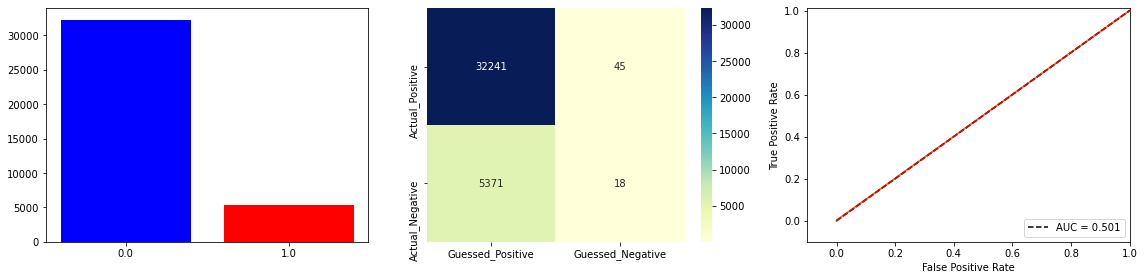

In [30]:
model_performance(target, predictions)

Area Under the Curve: 0.59


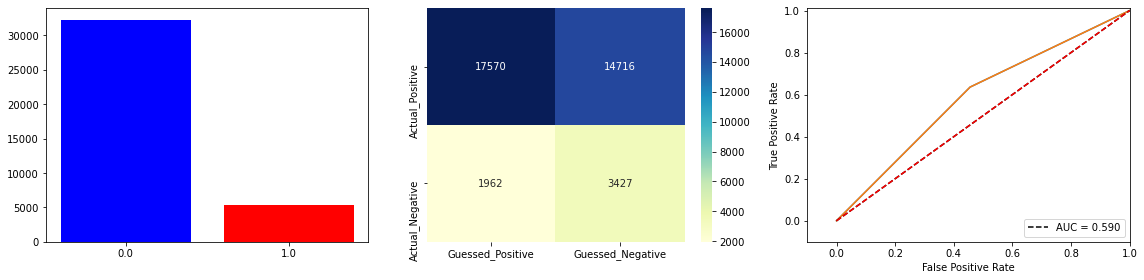


Duration: 1 seconds


In [31]:
start_time = time.time()
lr_weight = LogisticRegression(class_weight="balanced")
predictions_weight_balanced = cross_val_predict(lr_weight, features, target, cv=3)
model_performance(target, predictions_weight_balanced)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

## LOGISTIC REGRESSION WITH SMOTE OVER SAMPLING

Area Under the Curve: 0.59


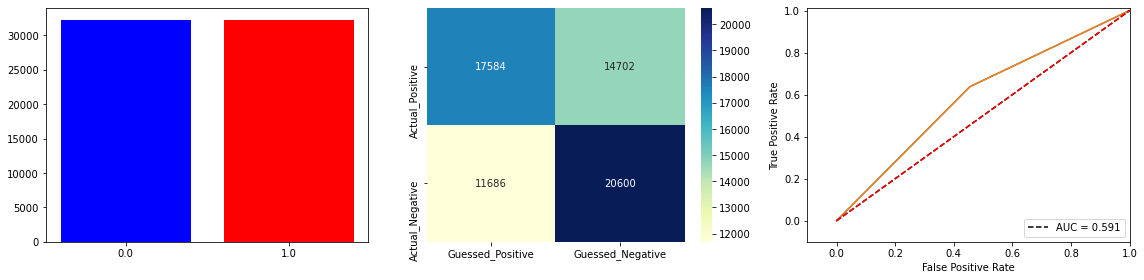


Duration: 3 seconds


In [33]:
start_time = time.time()
smote = SMOTE(sampling_strategy='minority')
features_sm, target_sm = smote.fit_sample(features, target)
predictions_sm = cross_val_predict(lr, features_sm, target_sm, cv=3)
model_performance(pd.Series(target_sm), pd.Series(predictions_sm))
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

## SCALING AND NORMALIZING THE DATA

In [34]:
def normalize(subset):
   continious_columns = subset.select_dtypes(include=['float']).columns
   mm_scaler = preprocessing.MinMaxScaler()
   for col in continious_columns:
     subset[col]= mm_scaler.fit_transform(subset[[col]])
   return subset

In [35]:
lr = LogisticRegression()
scaled_data = normalize(data)
features_scaled = scaled_data.drop(columns=['loan_status'],axis=1)
target_scaled = scaled_data['loan_status']

Area Under the Curve: 0.6


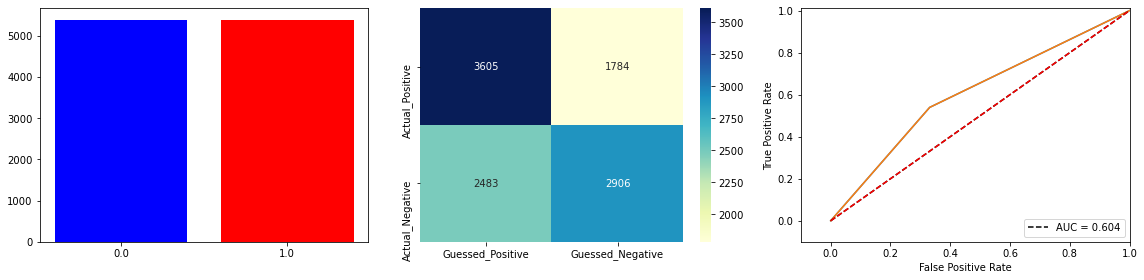

In [36]:
rus = RandomUnderSampler(random_state=0)
rus.fit(features_scaled, target_scaled)
features_sc, target_sc = rus.fit_resample(features_scaled, target_scaled)
predictions_sc = cross_val_predict(lr, features_sc, target_sc, cv=3)
model_performance(pd.Series(target_sc), pd.Series(predictions_sc))

## XGBOOST CLASSIFIER

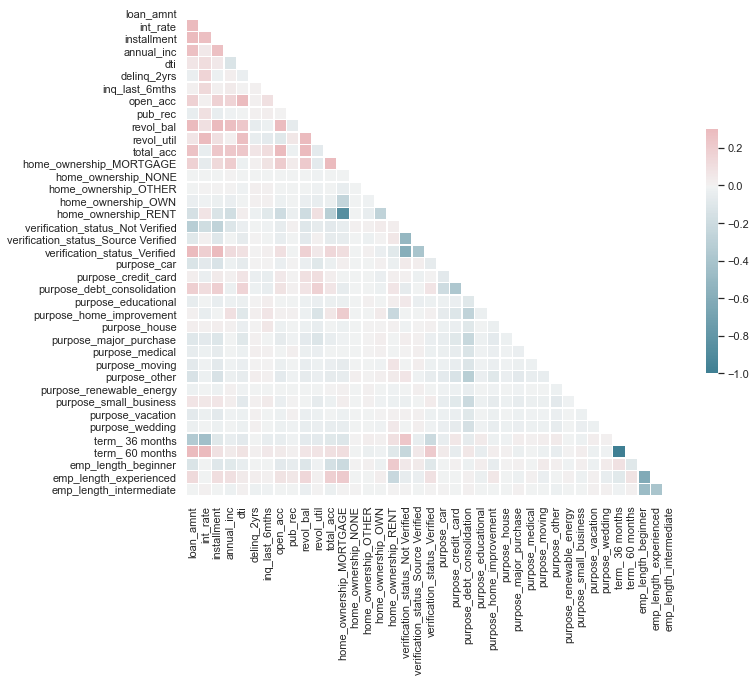

In [37]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
plot_correlation_heatmap(features)

In [38]:
features.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'emp_length_beginner', 'emp_length_experienced',
       'emp_length_intermediate'],
      dtype='object')

In [39]:
features_corr = features.drop(columns=['home_ownership_RENT','term_ 60 months','home_ownership_NONE', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],axis=1)

In [40]:
print(features_corr.shape)
print(target.shape)

(37675, 22)
(37675,)


In [42]:
start_time = time.time()
smote = SMOTE(sampling_strategy='minority')
features_c, target_c = smote.fit_sample(features_corr, target)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 1 seconds


In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
import xgboost as xgb

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(features_c, target_c, test_size=0.33)
model = xgb.XGBClassifier()
param_dist = {"max_depth": [3,5],
              "min_child_weight" : [3,6],
              "n_estimators": [100],
              "learning_rate": [0.05,.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1, scoring="f1")
grid_search.fit(X_train, Y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## XGBOOST HYPERPARAMETER

1)objective='binary:logistic' for binary classification and 'objective': 'multi:softmax' softmax for multiclass classification you also need to set num_class(number of classes)
2)subsample=0.8 = subsample, which is for each tree the % of rows taken to build the tree.
3)colsample_bytree: number of columns used by each tree.
4)max_depth = It represents the depth of each tree, which is the maximum number of different features used in each tree.
5)n_estimator = maximun number of decision tress.
booster parameter allows you to set the type of model you will use when building the ensemble. The default is gbtree which builds an ensemble of decision trees. If your data isn’t too complicated, you can go with the faster and simpler gblinear option which builds an ensemble of linear models.
The gamma parameter can also help with controlling overfitting. It specifies the minimum reduction in the loss required to make a further partition on a leaf node of the tree.
8)scoring: "f1" pr "accuracy"
9)scale_pos_weight parameter impose greater penalties for errors on the minor class

In [49]:
import time
start_time = time.time()
model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=100,  gamma=5,colsample_bytree=.6, subsample=0.8, scoring = 'f1',scale_pos_weight=1)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 0 seconds


In [50]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]
model.fit(X_train,Y_train, verbose=True, eval_metric=eval_metric, eval_set=eval_set)

[16:06:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scoring" } are not used.

[0]	validation_0-auc:0.90450	validation_0-error:0.16682	validation_1-auc:0.89767	validation_1-error:0.17190
[1]	validation_0-auc:0.91344	validation_0-error:0.15440	validation_1-auc:0.90713	validation_1-error:0.16007
[2]	validation_0-auc:0.92899	validation_0-error:0.13492	validation_1-auc:0.92406	validation_1-error:0.14083
[3]	validation_0-auc:0.93014	validation_0-error:0.13462	validation_1-auc:0.92713	validation_1-error:0.14097
[4]	validation_0-auc:0.92929	validation_0-error:0.13816	validation_1-auc:0.92622	validation_1-error:0.14323
[5]	validation_0-auc:0.93250	validation_0-error:0.13432	validation_1-auc:0.92974	validation_1-error:0.13999
[6]	validation_0-auc:0.93064	validation_0-error:0.13718	validation_1-auc:0.92809	validation_1-error:0.14238
[7]	validation_0-auc:0.93459	validation_0-error

[74]	validation_0-auc:0.94478	validation_0-error:0.11315	validation_1-auc:0.93930	validation_1-error:0.11906
[75]	validation_0-auc:0.94475	validation_0-error:0.11356	validation_1-auc:0.93925	validation_1-error:0.11925
[76]	validation_0-auc:0.94496	validation_0-error:0.11275	validation_1-auc:0.93940	validation_1-error:0.11864
[77]	validation_0-auc:0.94509	validation_0-error:0.11222	validation_1-auc:0.93957	validation_1-error:0.11826
[78]	validation_0-auc:0.94513	validation_0-error:0.11227	validation_1-auc:0.93957	validation_1-error:0.11817
[79]	validation_0-auc:0.94508	validation_0-error:0.11278	validation_1-auc:0.93950	validation_1-error:0.11859
[80]	validation_0-auc:0.94528	validation_0-error:0.11180	validation_1-auc:0.93972	validation_1-error:0.11774
[81]	validation_0-auc:0.94519	validation_0-error:0.11222	validation_1-auc:0.93960	validation_1-error:0.11784
[82]	validation_0-auc:0.94514	validation_0-error:0.11250	validation_1-auc:0.93949	validation_1-error:0.11864
[83]	validation_0-a

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

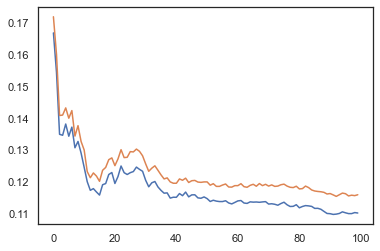

In [51]:
error_train = model.evals_result()['validation_0']['error']
error_test =  model.evals_result()['validation_1']['error']
plt.plot(range(len(error_train)), error_train)
plt.plot(range(len(error_test)), error_test)

Area Under the Curve: 0.88


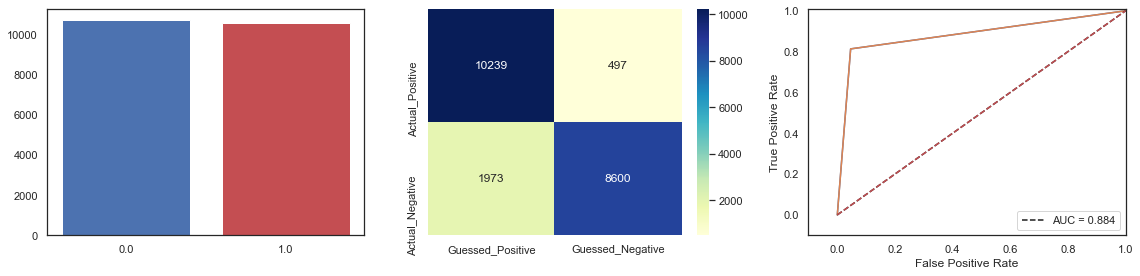

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     10736
         1.0       0.95      0.81      0.87     10573

    accuracy                           0.88     21309
   macro avg       0.89      0.88      0.88     21309
weighted avg       0.89      0.88      0.88     21309

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'eval_metric': None, 'gamma': 5, 'gpu_id': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': None, 'v

In [52]:
predictions = model.predict(X_test)
model_performance(pd.Series(Y_test), pd.Series(predictions))
print(metrics.classification_report(Y_test,predictions))
print(model.get_xgb_params())
print(model.feature_importances_)
print("Precision = {}".format(precision_score(Y_test, predictions, average='macro')))
print("Recall = {}".format(recall_score(Y_test, predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, predictions)))
print(metrics.confusion_matrix(Y_test, predictions))

term_ 36 months                        0.552206
inq_last_6mths                         0.122606
emp_length_intermediate                0.053473
emp_length_experienced                 0.039957
home_ownership_MORTGAGE                0.037856
verification_status_Verified           0.036145
verification_status_Source Verified    0.030031
emp_length_beginner                    0.027693
verification_status_Not Verified       0.025287
home_ownership_OWN                     0.019634
int_rate                               0.014645
delinq_2yrs                            0.007677
pub_rec                                0.006287
revol_util                             0.004537
annual_inc                             0.004138
open_acc                               0.003930
loan_amnt                              0.003729
installment                            0.003175
revol_bal                              0.002204
total_acc                              0.002014
dti                                    0

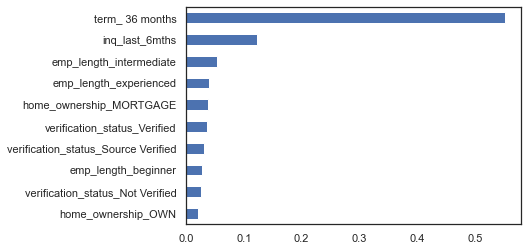

In [53]:
coefficients = model.feature_importances_
feature_importance = pd.Series(coefficients,
                            index=features_corr.columns, )

feature_importance_ordered = feature_importance.abs().sort_values(ascending=False)
print(feature_importance_ordered )
feature_importance_ordered[0:10].sort_values().plot.barh()
plt.show()

## MAX VOTING

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
start_time = time.time()
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression(class_weight='balanced')

model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 22 seconds


## DECISION TREE CLASSIFIER

Area Under the Curve: 0.84


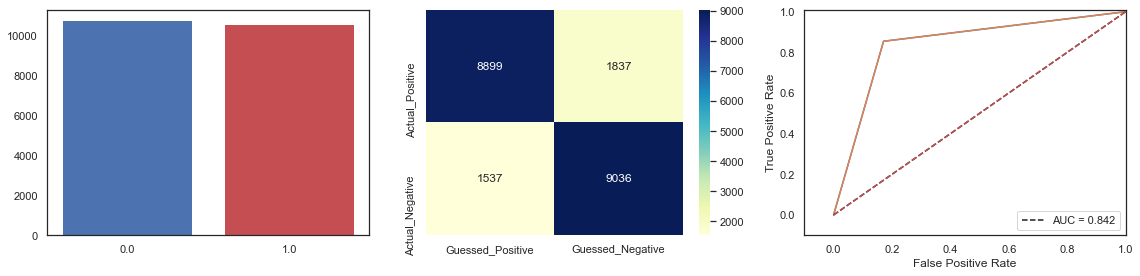

In [56]:
model_performance(pd.Series(Y_test), pd.Series(pred1))

## K-NEIGHBOURS CLASSIFIER

Area Under the Curve: 0.75


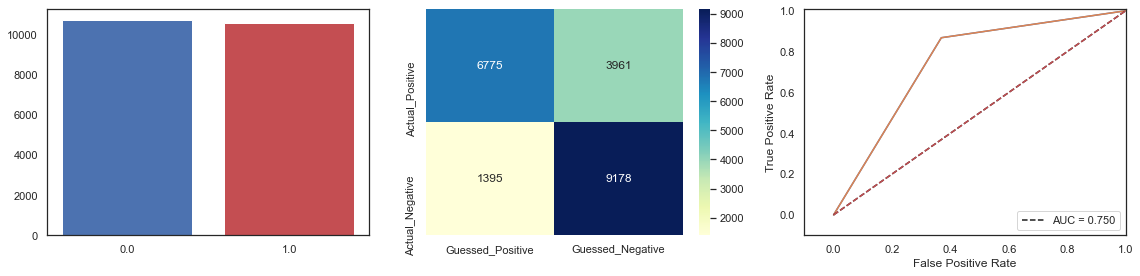

In [57]:
model_performance(pd.Series(Y_test), pd.Series(pred2))

## LOGISTIC REGRESSION

Area Under the Curve: 0.64


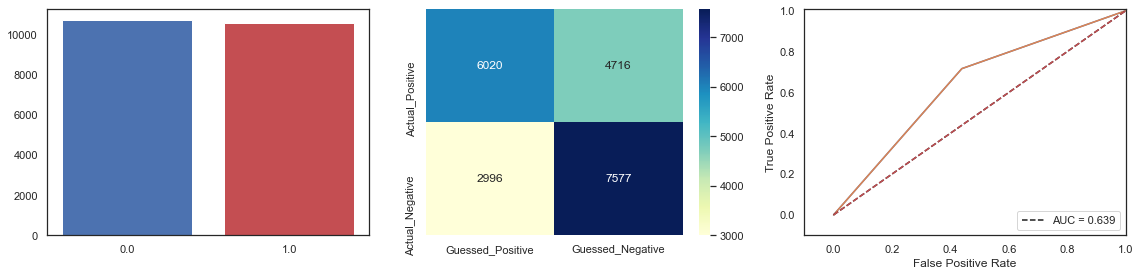

In [58]:
model_performance(pd.Series(Y_test), pd.Series(pred3))

In [59]:
import statistics as s

## MAX VOTING ENSEMBLING TECHNIQUE

In [60]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, s.mode([pred1[i], pred2[i], pred3[i]]))

Area Under the Curve: 0.82


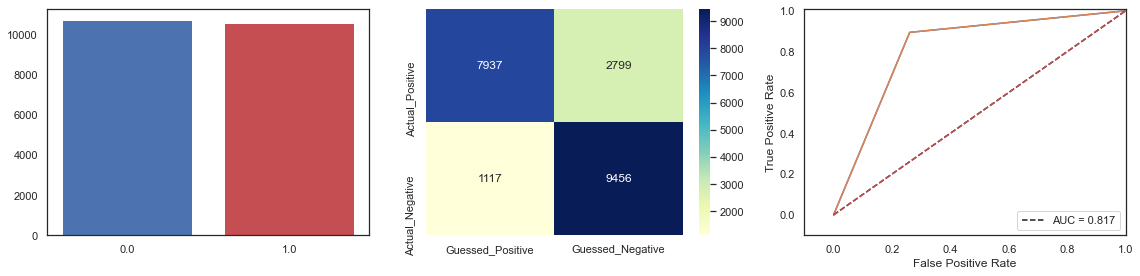

Recall = 0.8168209587999578


In [61]:
model_performance(pd.Series(Y_test), pd.Series(final_pred))
print("Recall = {}".format(recall_score(Y_test, final_pred, average='macro')))

Area Under the Curve: 0.82


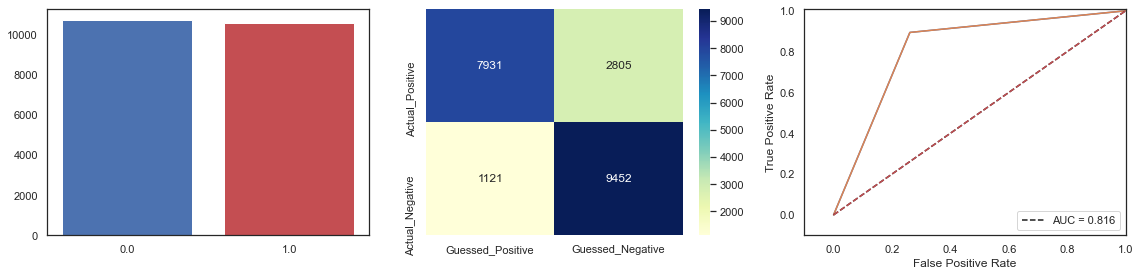

Recall = 0.816352364048233


In [62]:
from sklearn.ensemble import VotingClassifier
model_vc = VotingClassifier(estimators=[('lr', model3), ('dt', model1), ('knn',model2 )], voting='hard')
model_vc.fit(X_train,Y_train)
pred_vc=model_vc.predict(X_test)
model_performance(pd.Series(Y_test), pd.Series(pred_vc))
print("Recall = {}".format(recall_score(Y_test, pred_vc, average='macro')))